In [12]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [13]:
data = pd.read_csv('../Data/insurance_data.csv')

Exploratory Data Analysis

In [14]:
data.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [15]:
data.describe()

,age,affordibility,bought_insurance
count,28.000000,28.000000,28.000000
mean,39.892857,0.678571,0.500000
std,15.497525,0.475595,0.509175
min,18.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000
50%,45.500000,1.000000,0.500000
75%,54.250000,1.000000,1.000000
max,62.000000,1.000000,1.000000


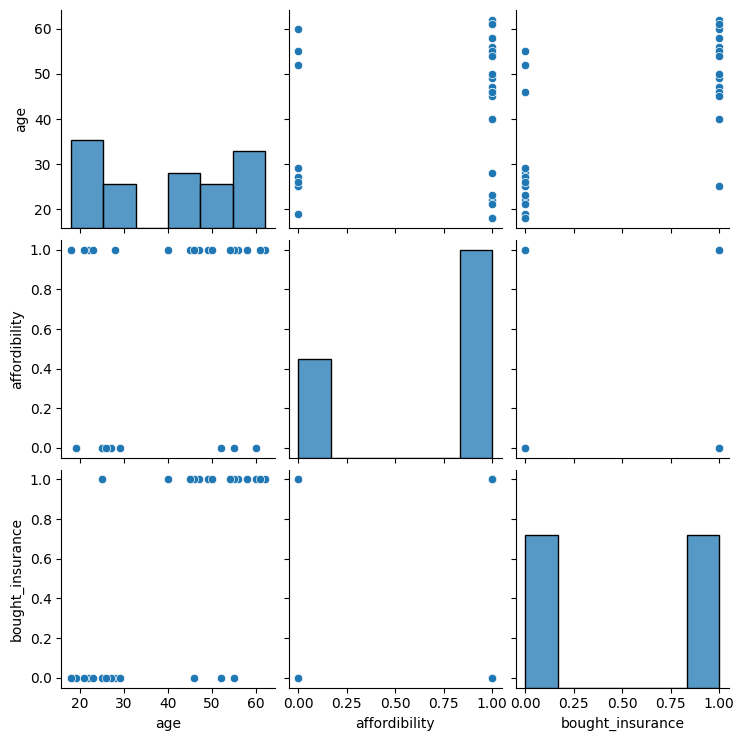

In [16]:
sns.pairplot(data)

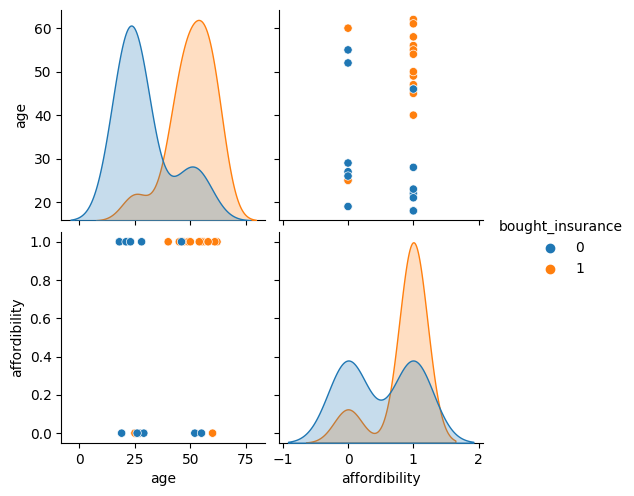

In [17]:
sns.pairplot(data, hue='bought_insurance')

In [18]:

scatter_matrix = px.scatter_matrix(data, dimensions=data.columns, title='Scatter Matrix')
scatter_matrix.show()

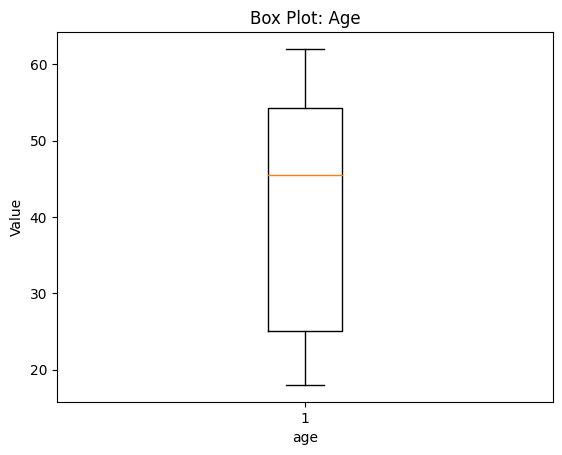

In [21]:
box_column = 'age'
plt.boxplot(data[box_column])
plt.xlabel('age')
plt.ylabel('Value')
plt.title('Box Plot: Age')
plt.show()

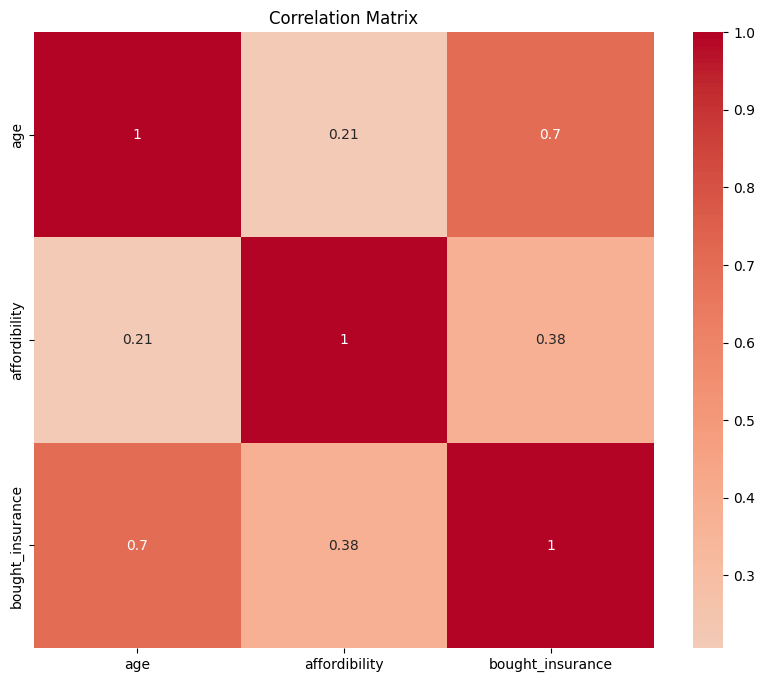

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [29]:
x = data[['age', 'affordibility']]
y = data['bought_insurance']

Model Splitting

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Feature Scaling

In [32]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] /100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] /100

In [33]:
len(X_test_scaled)

6

Neural Network Construction

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [47]:
model = Sequential([
    keras.layers.Dense(1, 
                       input_shape = (2,), 
                       activation = 'sigmoid',
                       kernel_initializer = 'ones',
                       bias_initializer = 'zeros')
])

In [48]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

Model Training

In [50]:
model.fit(X_train_scaled, y_train, epochs=5000, verbose=1)

Epoch 1/5000
1/1 [==============================] - 0s 20ms/step - loss: 0.4923 - accuracy: 0.9091
Epoch 2/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.4922 - accuracy: 0.9091
Epoch 3/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4922 - accuracy: 0.9091
Epoch 4/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4922 - accuracy: 0.9091
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.9091
Epoch 6/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.9091
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4921 - accuracy: 0.9091
Epoch 8/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4921 - accuracy: 0.9091
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4921 - accuracy: 0.9091
Epoch 10/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4921 - accuracy: 0.9091
Epoch 11/5000
1/1

In [51]:
model.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 104ms/step - loss: 0.1297 - accuracy: 1.0000


[0.12966617941856384, 1.0]

In [52]:
model.predict(X_test_scaled)

1/1 [==============================] - 0s 58ms/step


array([[0.917474  ],
       [0.85446066],
       [0.9241224 ],
       [0.08260597],
       [0.2407134 ],
       [0.08978666]], dtype=float32)